## _Time Series Analysis_ pada Data GDELT

### Data

Data yang digunakan adalah data _average Tone_ dari pembeitaan tentang _global warming_ yang bersumber pada GDELT.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gw = pd.read_excel('Data_Master.xlsx', 'Global Warming')
# pa = pd.read_excel('Data_Master.xlsx', 'Penyebab Alami')
# pi = pd.read_excel('Data_Master.xlsx', 'Perubahan Iklim')
# mi = pd.read_excel('Data_Master.xlsx', 'Mitigasi')
# pe = pd.read_excel('Data_Master.xlsx', 'Penyakit')
# full = pd.read_excel('Data_Master.xlsx', 'FULL')

In [3]:
gw

,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1EthnicCode,...,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL,title,content
0,760690147,2018-06-01,201806,2018,2018.4137,BUS,INDUSTRY,NaN,NaN,NaN,...,"Jakarta, Jakarta Raya, Indonesia",ID,ID04,-6.17444,106.829,-2679652,20180601,http://www.jcnnewswire.com/pressrelease/43825/...,Eight National Banks and WWF-Indonesia Launch ...,Eight National Banks and WWF-Indonesia Launch ...
1,760690148,2018-06-01,201806,2018,2018.4137,BUS,INDUSTRY,NaN,NaN,NaN,...,"Jakarta, Jakarta Raya, Indonesia",ID,ID04,-6.17444,106.829,-2679652,20180601,http://www.jcnnewswire.com/pressrelease/43825/...,Eight National Banks and WWF-Indonesia Launch ...,Eight National Banks and WWF-Indonesia Launch ...
2,760691450,2018-06-01,201806,2018,2018.4137,IDN,INDONESIAN,IDN,NaN,NaN,...,"Jakarta, Jakarta Raya, Indonesia",ID,ID04,-6.17444,106.829,-2679652,20180601,http://www.jcnnewswire.com/pressrelease/43825/...,Eight National Banks and WWF-Indonesia Launch ...,Eight National Banks and WWF-Indonesia Launch ...
3,760691451,2018-06-01,201806,2018,2018.4137,IDN,INDONESIA,IDN,NaN,NaN,...,"Jakarta, Jakarta Raya, Indonesia",ID,ID04,-6.17444,106.829,-2679652,20180601,http://www.jcnnewswire.com/pressrelease/43825/...,Eight National Banks and WWF-Indonesia Launch ...,Eight National Banks and WWF-Indonesia Launch ...
4,760691455,2018-06-01,201806,2018,2018.4137,IDNBUS,INDONESIAN,IDN,NaN,NaN,...,"Jakarta, Jakarta Raya, Indonesia",ID,ID04,-6.17444,106.829,-2679652,20180601,http://www.jcnnewswire.com/pressrelease/43825/...,Eight National Banks and WWF-Indonesia Launch ...,Eight National Banks and WWF-Indonesia Launch ...
5,760745173,2018-06-01,201806,2018,2018.4137,IDN,INDONESIA,IDN,NaN,NaN,...,Indonesia,ID,ID,-5.00000,120.000,ID,20180601,https://energy.economictimes.indiatimes.com/ne...,South Korea's sulphur cap alters Asian coal ma...,"By Clyde RussellLAUNCESTON, Australia: South K..."
6,760745174,2018-06-01,201806,2018,2018.4137,IDN,INDONESIA,IDN,NaN,NaN,...,Indonesia,ID,ID,-5.00000,120.000,ID,20180601,https://energy.economictimes.indiatimes.com/ne...,South Korea's sulphur cap alters Asian coal ma...,"By Clyde RussellLAUNCESTON, Australia: South K..."
7,760747530,2018-06-01,201806,2018,2018.4137,IDN,INDONESIAN,IDN,NaN,NaN,...,"Mount Merapi, Indonesia (general), Indonesia",ID,ID00,-7.54056,110.447,-2687821,20180601,https://www.channelnewsasia.com/news/asia/indo...,Indonesian authorities issue flight warning as...,JAKARTA: Indonesia raised the flight warning a...
8,760747534,2018-06-01,201806,2018,2018.4137,IDNGOV,INDONESIAN,IDN,NaN,NaN,...,"Mount Merapi, Indonesia (general), Indonesia",ID,ID00,-7.54056,110.447,-2687821,20180601,https://www.channelnewsasia.com/news/asia/indo...,Indonesian authorities issue flight warning as...,JAKARTA: Indonesia raised the flight warning a...
9,760747535,2018-06-01,201806,2018,2018.4137,IDNGOV,INDONESIA,IDN,NaN,NaN,...,"Mount Merapi, Indonesia (general), Indonesia",ID,ID00,-7.54056,110.447,-2687821,20180601,https://www.channelnewsasia.com/news/asia/indo...,Indonesian authorities issue flight warning as...,JAKARTA: Indonesia raised the flight warning a...


In [4]:
df = gw[['SQLDATE','AvgTone']]

In [5]:
data = df.groupby(('SQLDATE')).mean()

In [6]:
data = data[:133]

In [7]:
data.tail()

,AvgTone
SQLDATE,
2018-10-13,-0.368189
2018-10-14,-0.665216
2018-10-15,-0.663325
2018-10-16,-1.977216
2018-10-17,1.985981


In [8]:
data.count()

AvgTone    133
dtype: int64

Data yang digunakan sebanyak 136 data (n=136) dan berada pada rentang waktu 01 Juni 2018 sampai dengan 17 Oktober 2018.

### Pengecekan data yang hilang

Sebelum melakukan analisis data, dilakukan pengecekan data apakah terdapat _missing value_ (data hilang) atau tidak. Data yang tidak lengkap akan menyebabkan akurasi analisis yang kurang baik.

In [9]:
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,AvgTone
Total,0.0
Percent,0.0


Berdasarkan pengecekan yang telah dilakukan jelas bahwa data lengkap (tidak ada missing value)

### Plot Data _Time Series_

Dalam memilih suatu metode _time series_ (runtun waktu) yang tepat adalah dengan mempertimbangkan pola data, sehingga metode yang paling tepat dengan pola tersebut dapat diuji.

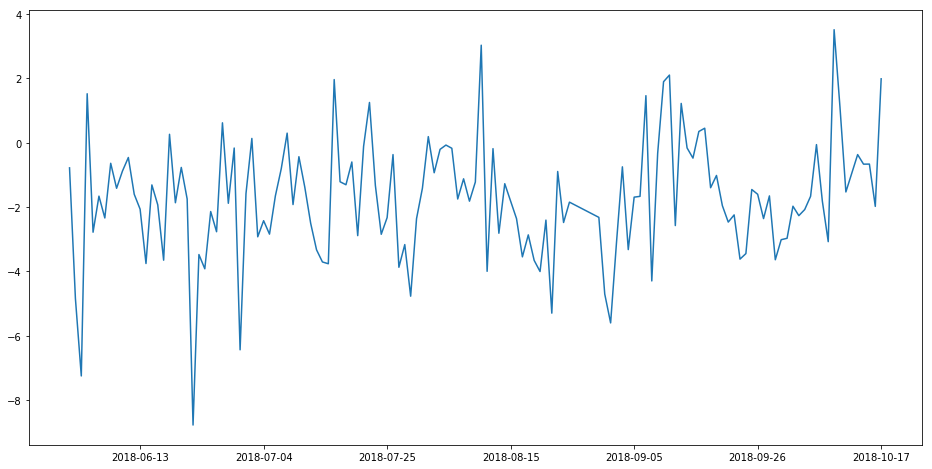

In [10]:
plt.figure(figsize=(16,8))
plt.plot(data['AvgTone'])

Nampak bahwa data observasi berubah-ubah sekitar tingkatan atau rata-rata yang konstan disebut pola horizontal. Tipe ini pada data runtun waktu disebut stationer dalam rata-rata. Data stasioner didefinisikan sebagai data yang  nilai  rata-ratanya tidak berubah dari waktu ke waktu atau dapat dikatakan data bersifat stabil.

Teknik yang digunakan dalam penelitian ini adalah:
1.	_Naïve_,
2.	_Simple average_,
3.	_Moving average_,
4. _Holt-Winters Method_,
5.	_Autoregressive integratrred moving average_ (_ARIMA_).

### Membuat data training dan data test

In [11]:
train=data[0:127] 
test=data[127:]

In [12]:
print(train.shape)
print(test.shape)

(127, 1)
(6, 1)


Data training yang digunakan sebanyak 127 data, data test yang digunakan sebanyak 6 data.

### Naive

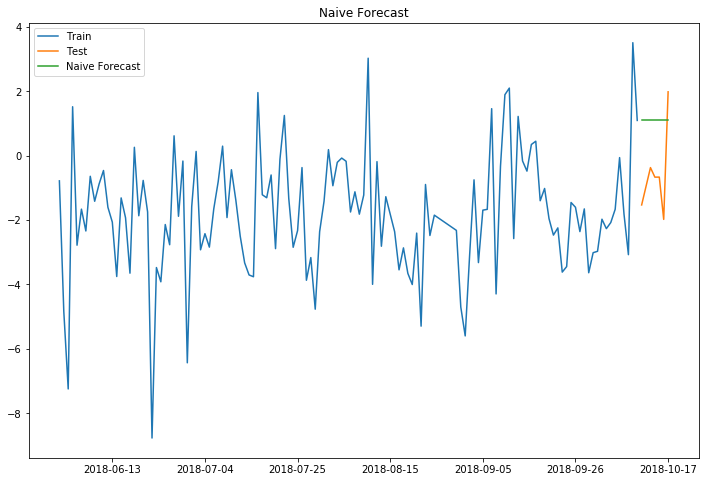

In [13]:
dd= np.asarray(train.AvgTone)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['AvgTone'], label='Train')
plt.plot(test.index,test['AvgTone'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [14]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [15]:
rms = sqrt(mean_squared_error(test.AvgTone, y_hat.naive))
print(rms)

2.060878382190636


### _Simple Average_

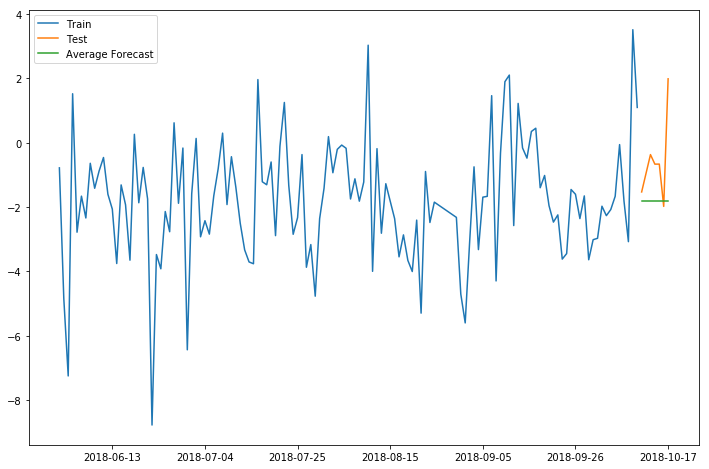

In [16]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['AvgTone'].mean()
plt.figure(figsize=(12,8))
plt.plot(train['AvgTone'], label='Train')
plt.plot(test['AvgTone'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [17]:
rms = sqrt(mean_squared_error(test.AvgTone, y_hat_avg.avg_forecast))
print(rms)

1.7864223154173822


### _Moving Average_

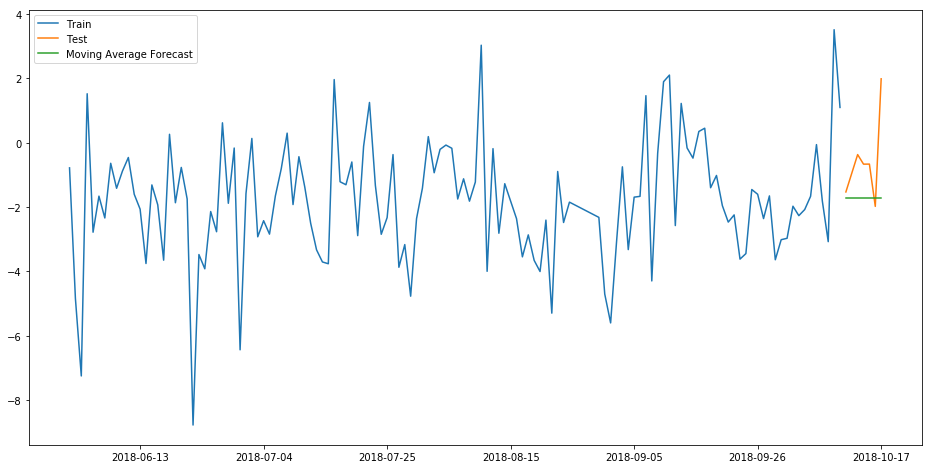

In [18]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['AvgTone'].rolling(60).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['AvgTone'], label='Train')
plt.plot(test['AvgTone'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [19]:
rms = sqrt(mean_squared_error(test.AvgTone, y_hat_avg.moving_avg_forecast))
print(rms)

1.7284272941806667


### _Holt-Winters Method_

In [21]:
from statsmodels.tsa.api import ExponentialSmoothing

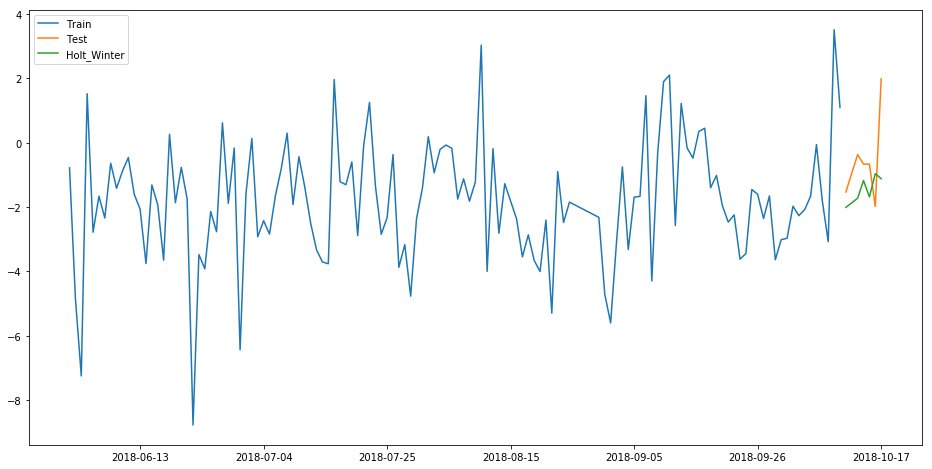

In [22]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['AvgTone']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['AvgTone'], label='Train')
plt.plot(test['AvgTone'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [23]:
rms = sqrt(mean_squared_error(test.AvgTone, y_hat_avg.Holt_Winter))
print(rms)

1.5291639111795385


### Kesimpulan

Metode terbaik yang dapat digunakan untuk forecasting data AvgTone adalah metode _Holt-Winters_ karena memiliki nilai _RMSE_ terkecil yaitu 1.5291639111795385.

Hasil forecasting dengan metode _Holt-Winters_ adalah sebagai berikut

In [43]:
y_hat_avg.Holt_Winter

SQLDATE
2018-10-11   -2.00901
2018-10-13   -1.72303
2018-10-14   -1.17343
2018-10-15   -1.68367
2018-10-16   -0.95985
2018-10-17   -1.11716
Name: Holt_Winter, dtype: float64